In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import resultcomp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plots
import json

In [85]:
directories= ['baseline', '20200517_231255', 'model']

In [86]:
snational, seast, swest = resultcomp.read_results(directories=directories)

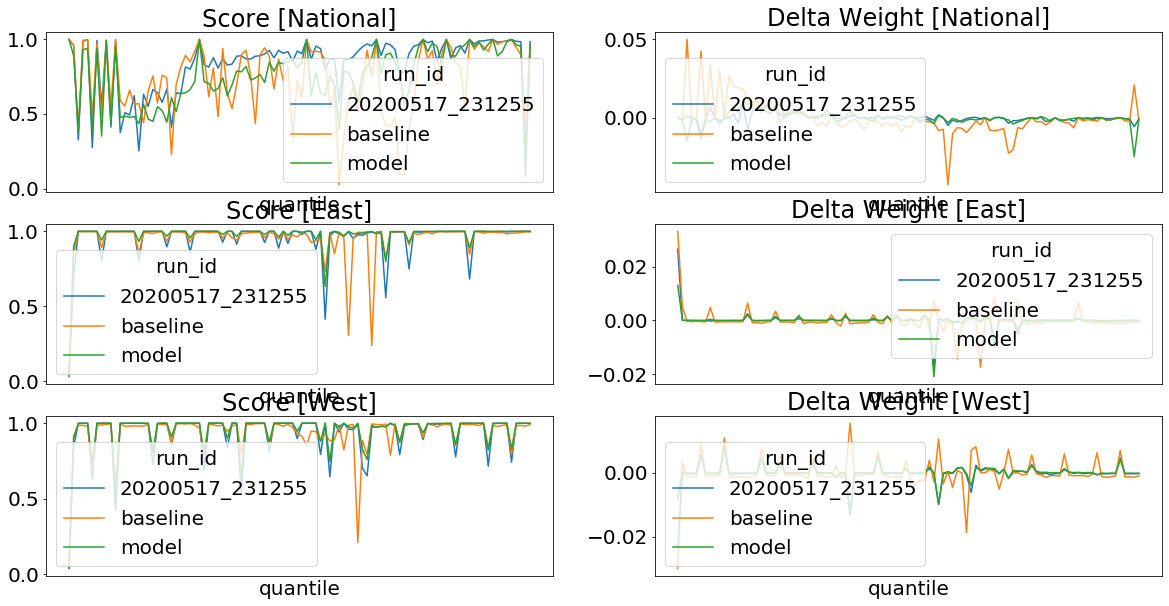

In [87]:
_ = resultcomp.plot_scores(snational, seast, swest)

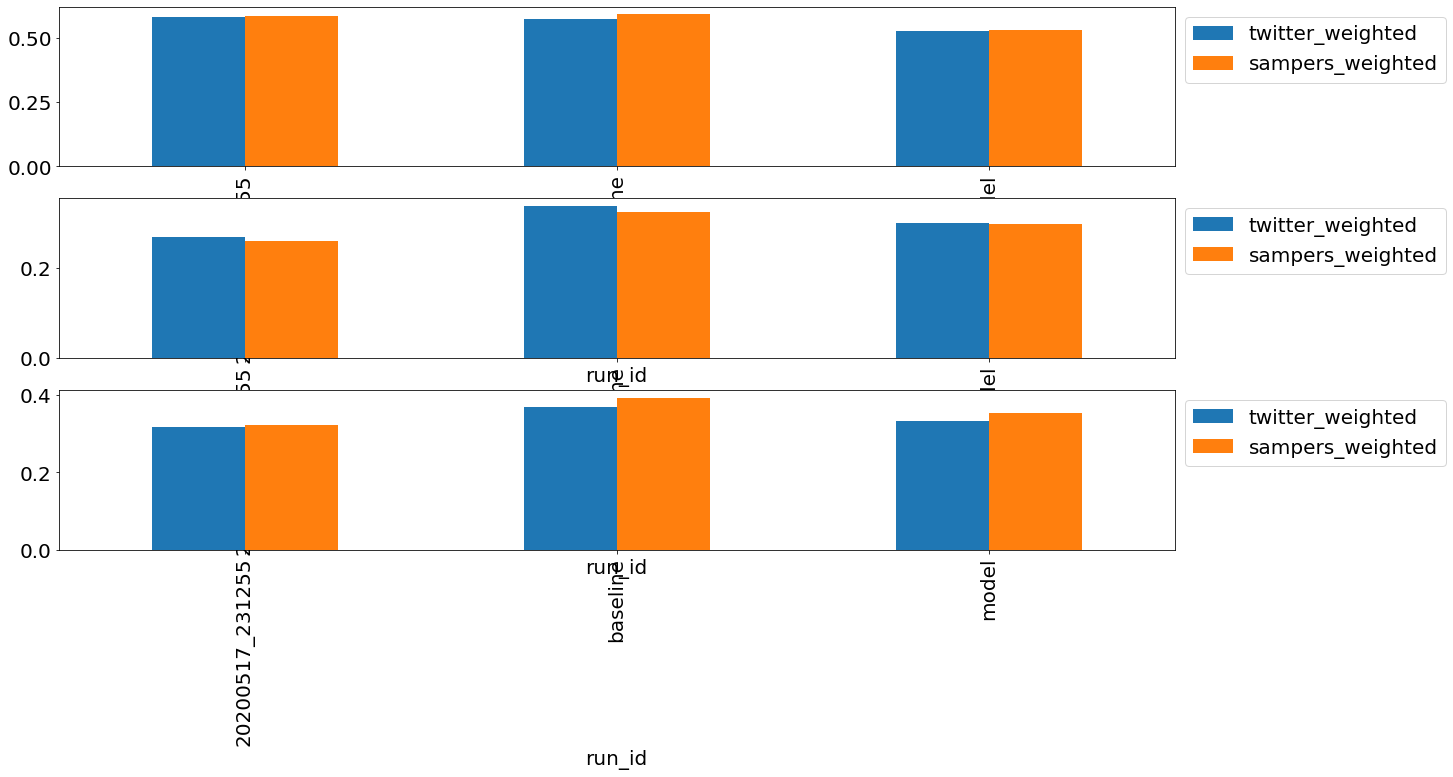

In [88]:
_ = resultcomp.plot_score_summary(snational, seast, swest)

In [8]:
with open('./../../results/model/parameters.json') as f:
    d = json.load(f)

In [9]:
d['visits']['model']['region_sampling']['beta']

0.05

# First round of parameter tuning

In [10]:
mse = resultcomp.results_mse(directories=None, start='20200515_173829', end='20200516_031006').set_index('directory')


In [11]:
mse = mse.sort_values('mse')
mse['tot_mse'] = mse.groupby('directory').apply(lambda x: x['mse'].sum())
mse.sort_values('tot_mse').head(20)

,scale,p,gamma,beta,mse,tot_mse
directory,,,,,,
20200515_200759,west,0.6,0.8,0.04,0.000011,0.000038
20200515_200759,national,0.6,0.8,0.04,0.000021,0.000038
20200515_200759,east,0.6,0.8,0.04,0.000006,0.000038
20200515_184232,national,0.3,0.8,0.04,0.000014,0.000038
20200515_184232,west,0.3,0.8,0.04,0.000019,0.000038
20200515_184232,east,0.3,0.8,0.04,0.000004,0.000038
20200515_181152,national,0.3,0.5,0.04,0.000027,0.000042
20200515_181152,west,0.3,0.5,0.04,0.000009,0.000042
20200515_181152,east,0.3,0.5,0.04,0.000006,0.000042


In [26]:
params = mse.groupby(['p', 'gamma', 'beta']).sum()['mse'].reset_index()
params

,p,gamma,beta,mse
0,0.3,0.2,0.01,0.000288
1,0.3,0.2,0.04,0.000088
2,0.3,0.2,0.07,0.000071
3,0.3,0.5,0.01,0.000166
4,0.3,0.5,0.04,0.000042
5,0.3,0.5,0.07,0.000125
6,0.3,0.8,0.01,0.000137
7,0.3,0.8,0.04,0.000038
8,0.3,0.8,0.07,0.000157
9,0.6,0.2,0.01,0.000530


In [42]:
p = params.query("mse < 0.00005")
p.shape

(4, 4)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(p, x='p', y='gamma', z='beta',
              color='mse')
fig.show()

# Second round of parameter tuning

In [44]:
mse = resultcomp.results_mse(directories=None, start='20200516_110344', end='20200518_050952').set_index('directory')

In [48]:
mse = mse.sort_values('mse')
mse['tot_mse'] = mse.groupby('directory').apply(lambda x: x['mse'].sum())
mse.sort_values('tot_mse').head(20)

,scale,p,gamma,beta,mse,tot_mse
directory,,,,,,
20200517_231255,east,0.4,0.75,0.03,0.000012,0.000026
20200517_231255,national,0.4,0.75,0.03,0.000008,0.000026
20200517_231255,west,0.4,0.75,0.03,0.000006,0.000026
20200517_235708,east,0.4,0.80,0.03,0.000010,0.000027
20200517_235708,national,0.4,0.80,0.03,0.000011,0.000027
20200517_235708,west,0.4,0.80,0.03,0.000006,0.000027
20200516_112959,west,0.3,0.80,0.03,0.000007,0.000029
20200516_112959,east,0.3,0.80,0.03,0.000009,0.000029
20200516_112959,national,0.3,0.80,0.03,0.000013,0.000029


In [49]:
params = mse.groupby(['p', 'gamma', 'beta']).sum()['mse'].reset_index()
params.sort_values('mse')

,p,gamma,beta,mse
18,0.4,0.75,0.03,0.000026
21,0.4,0.80,0.03,0.000027
12,0.3,0.80,0.03,0.000029
9,0.3,0.75,0.03,0.000031
24,0.4,0.85,0.03,0.000032
19,0.4,0.75,0.04,0.000034
13,0.3,0.80,0.04,0.000035
25,0.4,0.85,0.04,0.000035
10,0.3,0.75,0.04,0.000036
22,0.4,0.80,0.04,0.000036


In [54]:
p = params.query("mse < 0.00004")
p.shape

(11, 4)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(p, x='p', y='gamma', z='beta',
              color='mse')
fig.show()

In [89]:
dms = resultcomp.read_distance_metrics(directories=directories)


In [90]:
dms = dms[dms['sampers_mean'] != 0.0]
dms = dms.reset_index()
dms['run_id'] = dms['run_id'].str.title()
dms = dms.set_index(['scale', 'run_id', 'distance'])
dms

model_mean  gravity_seed_mean  \
scale    run_id   distance                                               
national Baseline (95.338, 102.07]     1.703611e-06       1.265390e-05   
                  (102.07, 108.851]    4.809886e-06       3.411839e-05   
                  (108.851, 115.402]   6.070375e-06       2.789140e-05   
                  (115.402, 121.788]   5.139976e-06       2.297667e-05   
                  (121.788, 128.103]   4.585608e-06       1.899057e-05   
...                                             ...                ...   
west     Model    (295.923, 316.2]     5.426225e-10       6.192111e-11   
                  (316.2, 341.702]     1.047799e-09       3.044043e-11   
                  (341.702, 379.925]   1.066534e-09       1.214290e-11   
                  (379.925, 466.471]   3.367925e-09       2.947716e-12   
                  (466.471, 1416.072]  1.927246e-09       6.037986e-14   

                                       gravity_mean  sampers_mean  \
scale    run_id   distance                                          
national Baseline (95.338, 102.07]     6.408754e-06  6.192792e-06   
                  (102.07, 108.851]    1.646461e-05  1.556160e-05   
                  (108.851, 115.402]   1.534940e-05  1.520865e-05   
                  (115.402, 121.788]   1.193670e-05  1.241070e-05   
                  (121.788, 128.103]   7.879588e-06  1.109036e-05   
...                                             ...           ...   
west     Model    (295.923, 316.2]     2.161393e-10  3.687802e-11   
                  (316.2, 341.702]     8.229639e-11  4.511090e-11   
                  (341.702, 379.925]   2.888158e-11  2.322601e-11   
                  (379.925, 466.471]   8.702678e-12  1.447649e-10   
                  (466.471, 1416.072]  2.357050e-13  5.353729e-12   

                                       model_variance  gravity_seed_variance  \
scale    run_id   distance                                                     
national Baseline (95.338, 102.07]       1.230496e-10           3.327533e-10   
                  (102.07, 108.851]      5.637306e-10           4.095704e-12   
                  (108.851, 115.402]     1.579481e-09           2.541416e-12   
                  (115.402, 121.788]     6.054027e-10           1.596755e-12   
                  (121.788, 128.103]     8.223435e-10           1.075434e-12   
...                                               ...                    ...   
west     Model    (295.923, 316.2]       1.199262e-15           1.097310e-22   
                  (316.2, 341.702]       2.582504e-15           4.229649e-23   
                  (341.702, 379.925]     2.244187e-15           1.573225e-23   
                  (379.925, 466.471]     1.050761e-14           3.237203e-24   
                  (466.471, 1416.072]    3.841019e-15           1.468048e-26   

                                       gravity_variance  sampers_variance  \
scale    run_id   distance                                                  
national Baseline (95.338, 102.07]         2.449200e-09      8.269654e-10   
                  (102.07, 108.851]        7.261652e-09      1.348119e-09   
                  (108.851, 115.402]       1.009503e-08      2.129499e-09   
                  (115.402, 121.788]       6.299495e-09      1.425700e-09   
                  (121.788, 128.103]       2.483071e-09      1.024461e-09   
...                                                 ...               ...   
west     Model    (295.923, 316.2]         2.454268e-18      7.516915e-18   
                  (316.2, 341.702]         3.588999e-19      1.629367e-17   
                  (341.702, 379.925]       6.109160e-20      5.385465e-18   
                  (379.925, 466.471]       5.756890e-21      2.678237e-16   
                  (466.471, 1416.072]      2.660542e-24      6.580974e-19   

                                       model_sum  gravity_seed_sum  \
scale    run_id   distance                                         

Baseline MSE: 1.48754e-04
20200517_231255 MSE: 7.92894e-06
Model MSE: 2.21276e-05


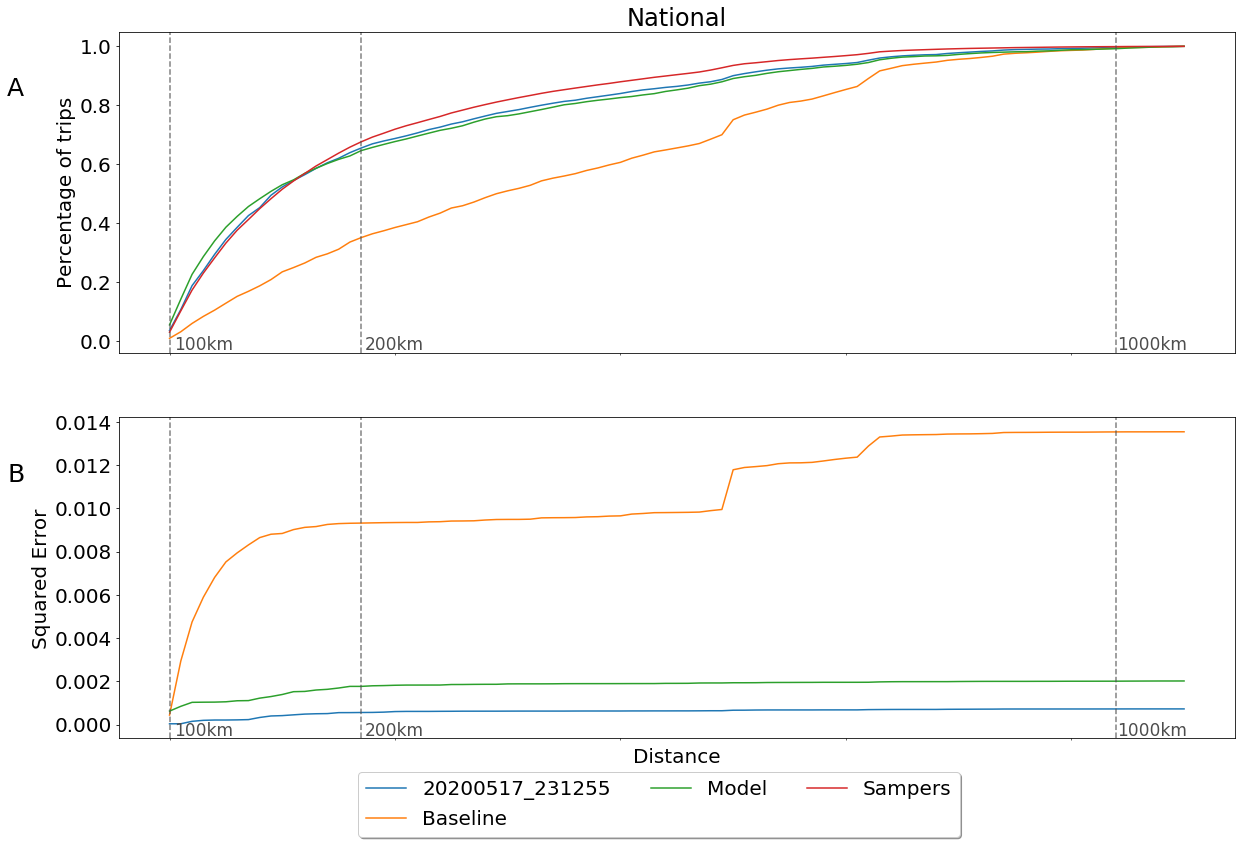

In [91]:
fig, axes = plots.plot_dist_distribution(dms, 'national')

axes[0].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.05, 0.01, "100km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.05, 0.01, "100km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(17, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(17, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.22, 0.01, "200km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.22, 0.01, "200km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(84, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(84, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.895, 0.01, "1000km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.895, 0.01, "1000km", transform=axes[1].transAxes, fontsize='17', c='0.3')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
      fancybox=True, shadow=True, ncol=3, bbox_transform = plt.gcf().transFigure)
fig.savefig('national_dd.png', dpi=160, bbox_inches='tight')

Baseline MSE: 2.06107e-05
20200517_231255 MSE: 1.16927e-05
Model MSE: 7.20657e-06


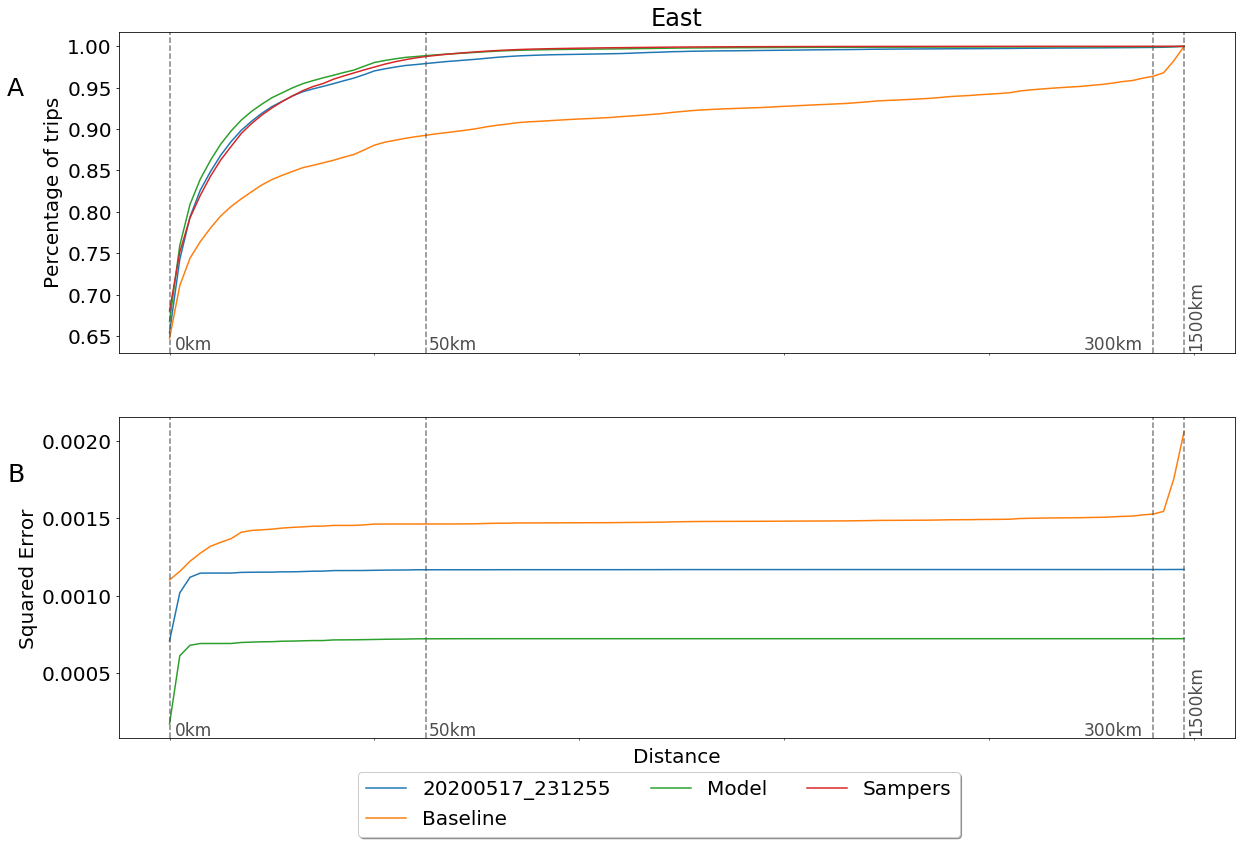

In [92]:
fig, axes = plots.plot_dist_distribution(dms, 'east')

axes[0].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.05, 0.01, "0km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.05, 0.01, "0km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(25, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(25, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.278, 0.01, "50km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.278, 0.01, "50km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(96, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(96, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.865, 0.01, "300km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.865, 0.01, "300km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.957, 0.02, "1500km", transform=axes[0].transAxes, fontsize='17', c='0.3', rotation='vertical')
axes[1].text(0.957, 0.02, "1500km", transform=axes[1].transAxes, fontsize='17', c='0.3', rotation='vertical')


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
      fancybox=True, shadow=True, ncol=3, bbox_transform = plt.gcf().transFigure)
fig.savefig('east_dd.png', dpi=160, bbox_inches='tight')

Baseline MSE: 2.51541e-05
20200517_231255 MSE: 6.05935e-06
Model MSE: 1.04635e-05


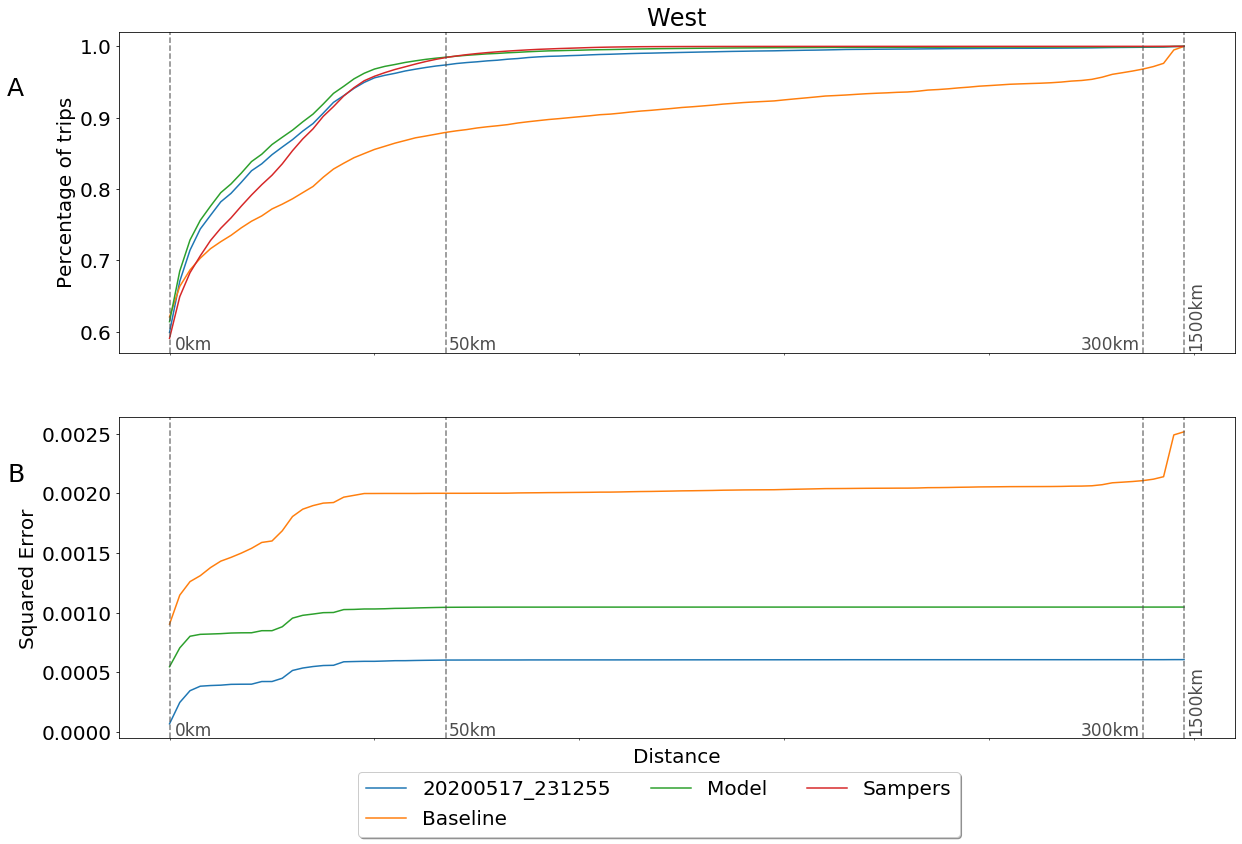

In [93]:
fig, axes = plots.plot_dist_distribution(dms, 'west')

axes[0].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.05, 0.01, "0km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.05, 0.01, "0km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(27, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(27, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.296, 0.01, "50km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.296, 0.01, "50km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(95, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(95, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.862, 0.01, "300km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.862, 0.01, "300km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.957, 0.02, "1500km", transform=axes[0].transAxes, fontsize='17', c='0.3', rotation='vertical')
axes[1].text(0.957, 0.02, "1500km", transform=axes[1].transAxes, fontsize='17', c='0.3', rotation='vertical')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
      fancybox=True, shadow=True, ncol=3, bbox_transform = plt.gcf().transFigure)
fig.savefig('west_dd.png', dpi=160, bbox_inches='tight')